# TP2 - ANN

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784')

In [ ]:
#Prendre un échantillon de données appelé data avec une taille de 5000 exemples
import numpy as np

rand = np.random.randint(70000, size=5000)
data5000 = mnist.data[rand]
label5000 = mnist.target[rand]
print(data5000.shape)
print(label5000.shape)

(5000, 784)
(5000,)


In [ ]:
#Diviser la base de données à 80% pour l’apprentissage (training) et à 20% pour les tests, 
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data5000, label5000, train_size=0.8)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4000, 784)
(1000, 784)
(4000,)
(1000,)


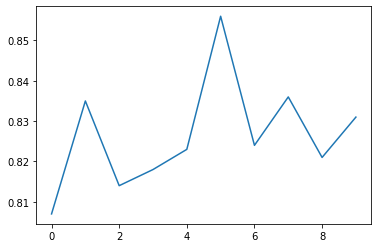

In [ ]:
#Construire un modèle de classification ayant comme paramètre : hidden_layer_sizes = (50), puis calculez la précession du classifieur ; 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
score = []
ite = []

for i in range(10):
  mlp = MLPClassifier(hidden_layer_sizes=(50)).fit(xtrain,ytrain)

  score.append(mlp.score(xtest,ytest))
  ite.append(i)

plt.plot(ite,score)

real class : 3
predict class : 3


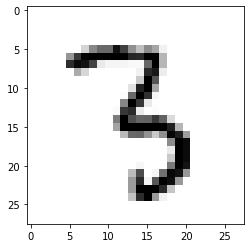

In [ ]:
#Afficher la classe de l’image 4 et sa classe prédite.
import matplotlib.pyplot as plt

ypredict=mlp.predict(xtest)

print("real class : "+str(ytest[3]))
print("predict class : "+str(ypredict[3]))
im = xtest[3].reshape((28, 28)) 
plt.imshow(im,cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

In [ ]:
#Calculez la précession en utilisant le package :  metrics.precision_score(ytest_pr, ypredTest_pr,average='micro').
from sklearn.metrics import precision_score

ypredict=mlp.predict(xtest)
prec_score=precision_score(ytest,ypredict,average='micro')

score=mlp.score(xtest,ytest)

print("precision_score : ",prec_score)
print("score : ",score)



precision_score :  0.829
score :  0.829


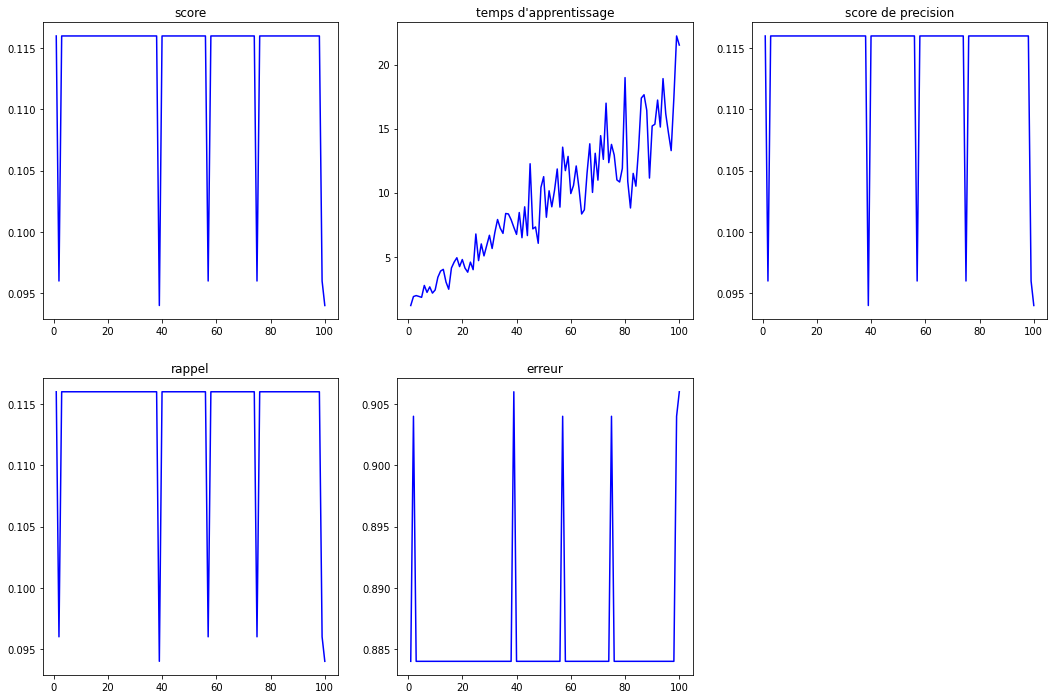

CPU times: user 18min, sys: 12min 12s, total: 30min 13s
Wall time: 15min 29s


In [ ]:
%%time
#Varier le nombre de couches de 1 entre (1 et 100) couches cachées, et recalculer la précision du classifieur. 
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import precision_score, recall_score, zero_one_loss

nb_couche = []
score = []
temps_appr = []
precision = []
recall = []
erreur = []

for c in range (1,101):
  t=tuple()
  for i in range(c):
    t=t+tuple((1,))

  start=time()
  mlp2 = MLPClassifier(hidden_layer_sizes=t).fit(xtrain,ytrain)
  end=time()

  ypredict=mlp2.predict(xtest)

  score.append(mlp2.score(xtest,ytest))
  temps_appr.append(end-start)
  precision.append(precision_score(ytest,ypredict,average='micro'))
  recall.append(recall_score(ytest,ypredict,average='micro'))
  erreur.append(zero_one_loss(ytest,ypredict))
  nb_couche.append(c)

fig=plt.figure(figsize=(18,12))

ax=fig.add_subplot(2,3,1)
ax.plot(nb_couche,score,c='b')
ax.set_title("score")

ax=fig.add_subplot(2,3,2)
ax.plot(nb_couche,temps_appr,c='b')
ax.set_title("temps d'apprentissage")

ax=fig.add_subplot(2,3,3)
ax.plot(nb_couche,precision,c='b')
ax.set_title("score de precision")

ax=fig.add_subplot(2,3,4)
ax.plot(nb_couche,recall,c='b')
ax.set_title("rappel")

ax=fig.add_subplot(2,3,5)
ax.plot(nb_couche,erreur,c='b')
ax.set_title("erreur")

plt.show()

1  :  (112,)
3  :  (18, 246, 152)
5  :  (57, 173, 113, 137, 116)
8  :  (153, 298, 119, 177, 286, 112, 204, 149)
10  :  (245, 155, 205, 10, 19, 43, 256, 132, 118, 51)


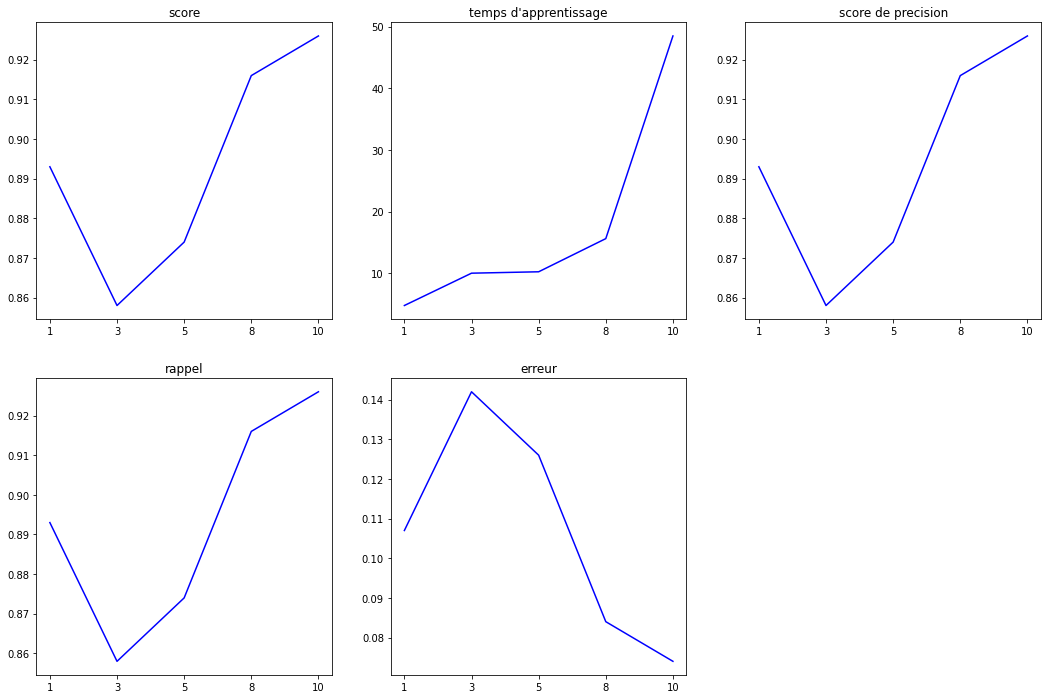

CPU times: user 2min 10s, sys: 47 s, total: 2min 57s
Wall time: 1min 29s


In [ ]:
%%time

# Construire cinq modèles de classification des données mnist, avec des
# réseaux qui ont respectivement de 1 à 10 couches cachées, et des tailles de
# couches entre 10 et 300 neurones au choix d’une façon aléatoire.

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import precision_score, recall_score, zero_one_loss
from random import randint

conf = []
score = []
temps_appr = []
precision = []
recall = []
erreur = []
nb_layer = [1,3,5,8,10]

for l in nb_layer:
  
  t=tuple()
  for i in range(l):
    nb_n = randint(10,300)
    t=t+tuple((nb_n,))

  start=time()
  mlp3 = MLPClassifier(hidden_layer_sizes=t).fit(xtrain,ytrain)
  end=time()

  ypredict=mlp3.predict(xtest)

  score.append(mlp3.score(xtest,ytest))
  temps_appr.append(end-start)
  precision.append(precision_score(ytest,ypredict,average='micro'))
  recall.append(recall_score(ytest,ypredict,average='micro'))
  erreur.append(zero_one_loss(ytest,ypredict))
  conf.append(str(l))
  print(l," : ",t)

fig=plt.figure(figsize=(18,12))

ax=fig.add_subplot(2,3,1)
ax.plot(conf,score,c='b')
ax.set_title("score")

ax=fig.add_subplot(2,3,2)
ax.plot(conf,temps_appr,c='b')
ax.set_title("temps d'apprentissage")

ax=fig.add_subplot(2,3,3)
ax.plot(conf,precision,c='b')
ax.set_title("score de precision")

ax=fig.add_subplot(2,3,4)
ax.plot(conf,recall,c='b')
ax.set_title("rappel")

ax=fig.add_subplot(2,3,5)
ax.plot(conf,erreur,c='b')
ax.set_title("erreur")

plt.show()

In [ ]:
print(score)

[0.893, 0.858, 0.874, 0.916, 0.926]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.

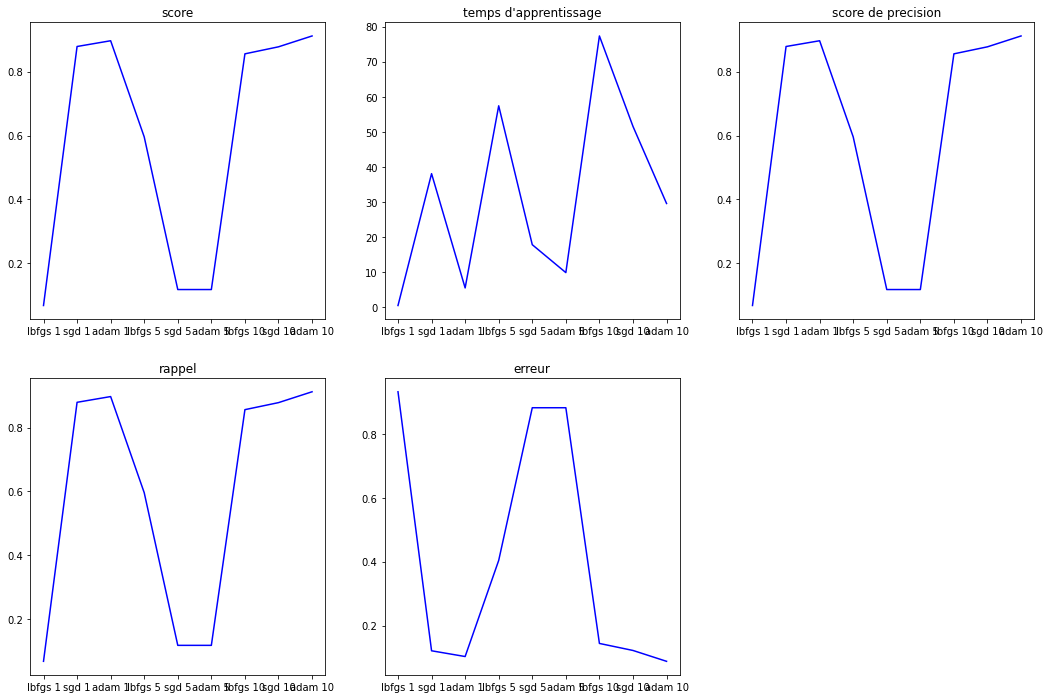

CPU times: user 7min 36s, sys: 1min 53s, total: 9min 29s
Wall time: 4min 49s


In [ ]:
%%time

#Étudier la convergence des algorithmes d’optimisation disponibles : L-BFGS, SGD et Adam.
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import precision_score, recall_score, zero_one_loss
from random import randint

conf = []
score = []
temps_appr = []
precision = []
recall = []
erreur = []
solver = ['lbfgs','sgd','adam']
layers = [tuple((245,)),tuple((245, 155, 205, 10, 19)),tuple((245, 155, 205, 10, 19, 43, 256, 132, 118, 51))] 

for l in layers:
  for s in solver:

    start=time()
    mlp4 = MLPClassifier(hidden_layer_sizes=l,solver=s).fit(xtrain,ytrain)
    end=time()

    ypredict=mlp4.predict(xtest)

    score.append(mlp4.score(xtest,ytest))
    temps_appr.append(end-start)
    precision.append(precision_score(ytest,ypredict,average='micro'))
    recall.append(recall_score(ytest,ypredict,average='micro'))
    erreur.append(zero_one_loss(ytest,ypredict))
    conf.append(s+" "+str(len(l)))

fig=plt.figure(figsize=(18,12))

ax=fig.add_subplot(2,3,1)
ax.plot(conf,score,c='b')
ax.set_title("score")

ax=fig.add_subplot(2,3,2)
ax.plot(conf,temps_appr,c='b')
ax.set_title("temps d'apprentissage")

ax=fig.add_subplot(2,3,3)
ax.plot(conf,precision,c='b')
ax.set_title("score de precision")

ax=fig.add_subplot(2,3,4)
ax.plot(conf,recall,c='b')
ax.set_title("rappel")

ax=fig.add_subplot(2,3,5)
ax.plot(conf,erreur,c='b')
ax.set_title("erreur")

plt.show()

In [ ]:
print(score)

[0.068, 0.879, 0.897, 0.596, 0.118, 0.118, 0.856, 0.878, 0.912]


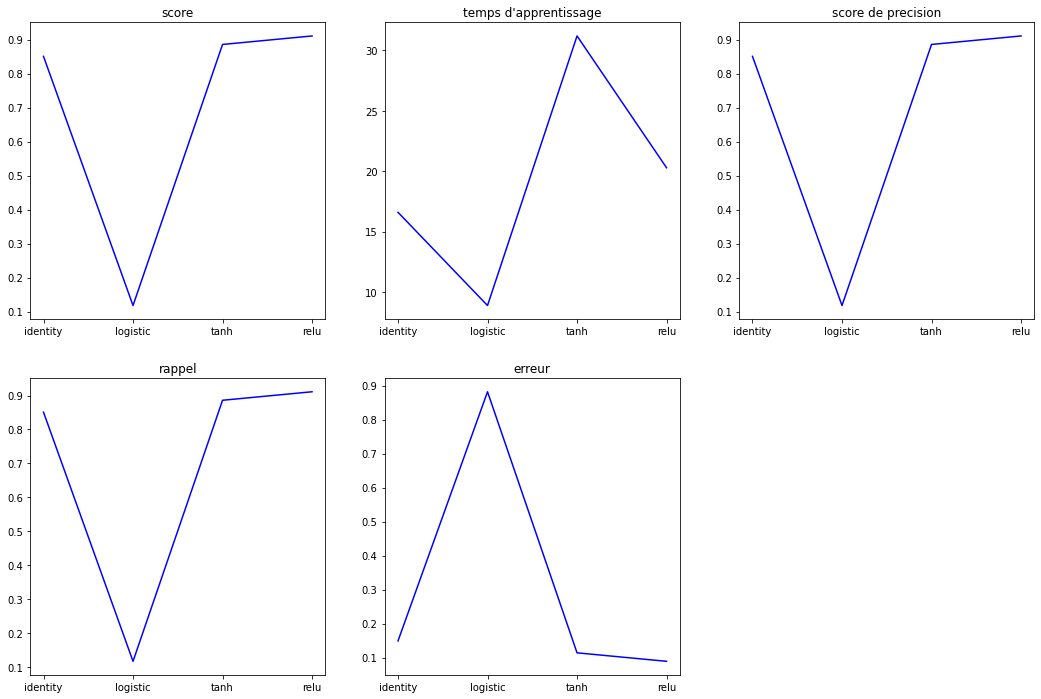

CPU times: user 1min 52s, sys: 41.6 s, total: 2min 33s
Wall time: 1min 18s


In [ ]:
%%time

#Varier les fonctions d’activation {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}.

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import precision_score, recall_score, zero_one_loss
from random import randint

conf = []
score = []
temps_appr = []
precision = []
recall = []
erreur = []
activation = ['identity','logistic','tanh','relu']
layers = tuple((245, 155, 205, 10, 19, 43, 256, 132, 118, 51))


for a in activation:

  start=time()
  mlp5 = MLPClassifier(hidden_layer_sizes=layers,activation=a).fit(xtrain,ytrain)
  end=time()

  ypredict=mlp5.predict(xtest)

  score.append(mlp5.score(xtest,ytest))
  temps_appr.append(end-start)
  precision.append(precision_score(ytest,ypredict,average='micro'))
  recall.append(recall_score(ytest,ypredict,average='micro'))
  erreur.append(zero_one_loss(ytest,ypredict))
  conf.append(a)

fig=plt.figure(figsize=(18,12))

ax=fig.add_subplot(2,3,1)
ax.plot(conf,score,c='b')
ax.set_title("score")

ax=fig.add_subplot(2,3,2)
ax.plot(conf,temps_appr,c='b')
ax.set_title("temps d'apprentissage")

ax=fig.add_subplot(2,3,3)
ax.plot(conf,precision,c='b')
ax.set_title("score de precision")

ax=fig.add_subplot(2,3,4)
ax.plot(conf,recall,c='b')
ax.set_title("rappel")

ax=fig.add_subplot(2,3,5)
ax.plot(conf,erreur,c='b')
ax.set_title("erreur")

plt.show()

In [ ]:
print(score)

[0.851, 0.118, 0.886, 0.911]


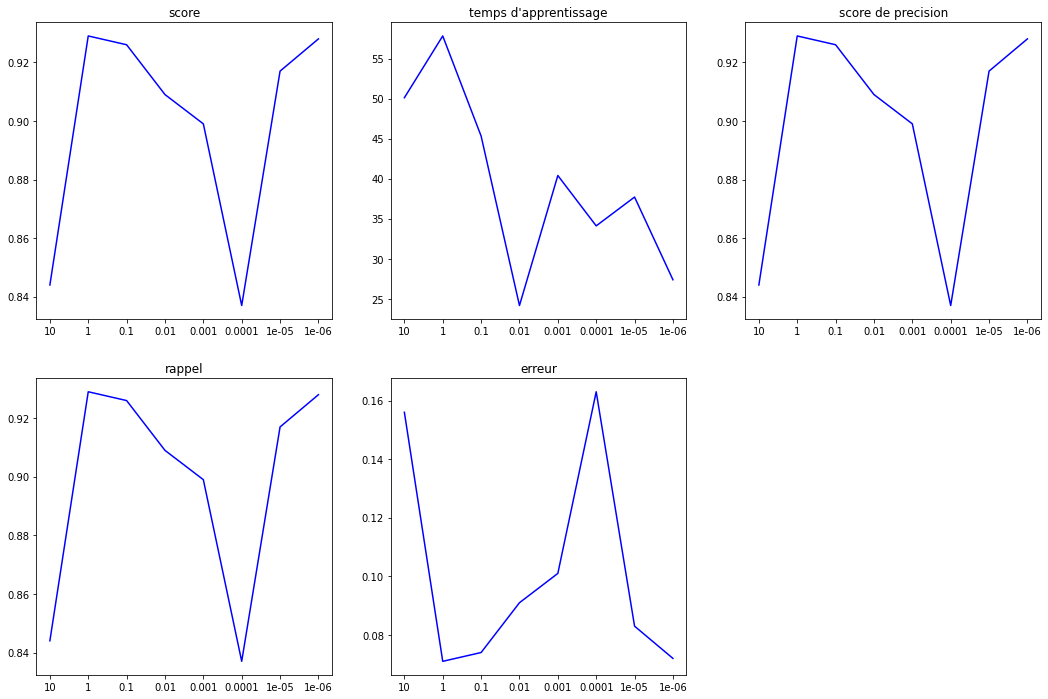

CPU times: user 7min 43s, sys: 2min 43s, total: 10min 27s
Wall time: 5min 18s


In [ ]:
%%time

#Changer la valeur de la régularisation L2 (paramètre α). 

from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from time import time
from sklearn.metrics import precision_score, recall_score, zero_one_loss
from random import randint

conf = []
score = []
temps_appr = []
precision = []
recall = []
erreur = []
alpha = [10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
layers = tuple((245, 155, 205, 10, 19, 43, 256, 132, 118, 51))


for a in alpha:

  start=time()
  mlp6 = MLPClassifier(hidden_layer_sizes=layers,activation='relu',alpha=a).fit(xtrain,ytrain)
  end=time()

  ypredict=mlp6.predict(xtest)

  score.append(mlp6.score(xtest,ytest))
  temps_appr.append(end-start)
  precision.append(precision_score(ytest,ypredict,average='micro'))
  recall.append(recall_score(ytest,ypredict,average='micro'))
  erreur.append(zero_one_loss(ytest,ypredict))
  conf.append(str(a))

fig=plt.figure(figsize=(18,12))

ax=fig.add_subplot(2,3,1)
ax.plot(conf,score,c='b')
ax.set_title("score")

ax=fig.add_subplot(2,3,2)
ax.plot(conf,temps_appr,c='b')
ax.set_title("temps d'apprentissage")

ax=fig.add_subplot(2,3,3)
ax.plot(conf,precision,c='b')
ax.set_title("score de precision")

ax=fig.add_subplot(2,3,4)
ax.plot(conf,recall,c='b')
ax.set_title("rappel")

ax=fig.add_subplot(2,3,5)
ax.plot(conf,erreur,c='b')
ax.set_title("erreur")

plt.show()

In [ ]:
print(score)

[0.844, 0.929, 0.926, 0.909, 0.899, 0.837, 0.917, 0.928]
